In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, class_sep=2, random_state=1)

Точность модели: 0.97
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       150
           1       0.97      0.97      0.97       150

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



<Figure size 640x480 with 0 Axes>

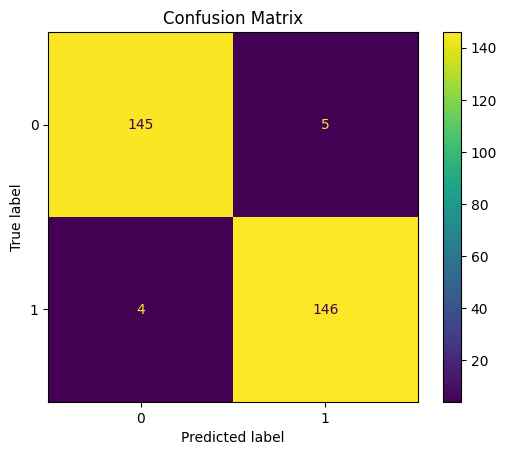

In [6]:
# Задание 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

plt.figure()
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

In [8]:
# Задание 2
learning_rates = [0.01, 0.1, 1, 10]
for lr in learning_rates:
    model_sgd = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=lr, max_iter=1000, random_state=1)
    model_sgd.fit(X_train, y_train)
    y_pred_sgd = model_sgd.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_sgd)
    print(f"Точность модели с learning rate {lr}: {accuracy}")


Точность модели с learning rate 0.01: 0.9733333333333334
Точность модели с learning rate 0.1: 0.97
Точность модели с learning rate 1: 0.9766666666666667
Точность модели с learning rate 10: 0.98


In [10]:
# Задание 3

X_train_with_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_with_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])


model_with_bias = LogisticRegression()
model_with_bias.fit(X_train_with_bias, y_train)
y_pred_with_bias = model_with_bias.predict(X_test_with_bias)
accuracy_with_bias = accuracy_score(y_test, y_pred_with_bias)
print(f"Точность модели с фиктивным столбцом: {accuracy_with_bias}")


Точность модели с фиктивным столбцом: 0.97


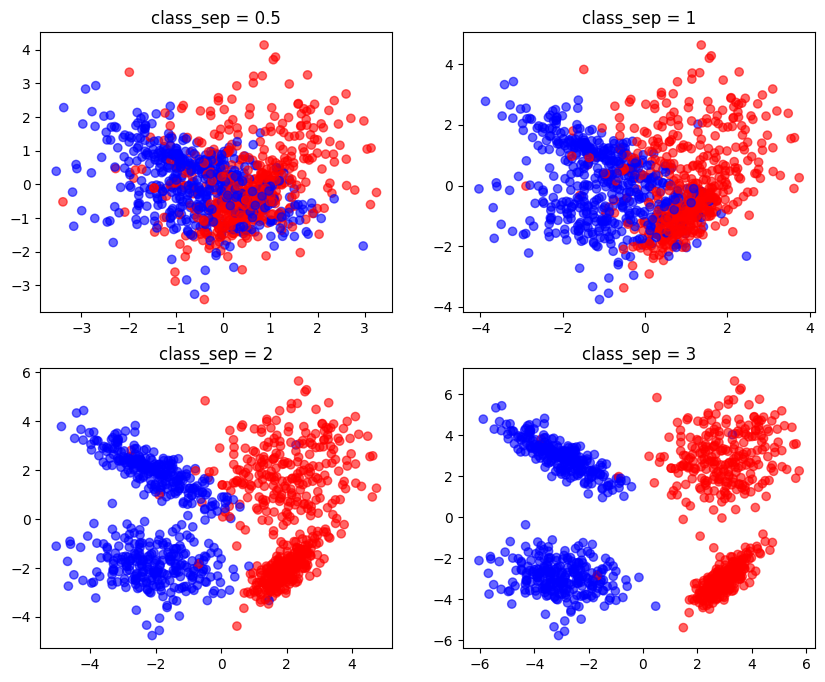

In [11]:
# Задание 4
class_seps = [0.5, 1, 2, 3]
plt.figure(figsize=(10, 8))
for i, sep in enumerate(class_seps, start=1):
    X_sep, y_sep = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, class_sep=sep, random_state=1)
    plt.subplot(2, 2, i)
    plt.scatter(X_sep[:, 0], X_sep[:, 1], c=y_sep, cmap='bwr', alpha=0.6)
    plt.title(f"class_sep = {sep}")
plt.show()


In [12]:
# Задание 5
X_high_dim, y_high_dim = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, n_classes=2, random_state=1)
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high_dim, y_high_dim, test_size=0.3, random_state=1)

model_high_dim = LogisticRegression(max_iter=1000)
model_high_dim.fit(X_train_high, y_train_high)
y_pred_high = model_high_dim.predict(X_test_high)
accuracy_high = accuracy_score(y_test_high, y_pred_high)
print(f"Точность модели на высокоразмерном датасете: {accuracy_high}")


Точность модели на высокоразмерном датасете: 0.8766666666666667


In [15]:
# Задание 6

X_multi, y_multi = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=4, class_sep=2, n_clusters_per_class=1, random_state=1)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.3, random_state=1)


model_multi = LogisticRegression(multi_class='ovr', max_iter=1000)
model_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = model_multi.predict(X_test_multi)
accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)
print(f"Точность модели для задачи многоклассовой классификации: {accuracy_multi}")


Точность модели для задачи многоклассовой классификации: 0.9666666666666667


/Users/aleksandr/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [14]:
# Задание 7
probabilities = model.predict_proba(X_test)
print("Вероятности принадлежности к классам:")
print(probabilities)


Вероятности принадлежности к классам:
[[4.36382028e-03 9.95636180e-01]
 [4.11024214e-01 5.88975786e-01]
 [1.00118720e-02 9.89988128e-01]
 [1.65178753e-02 9.83482125e-01]
 [1.25264044e-04 9.99874736e-01]
 [9.99553978e-01 4.46022038e-04]
 [1.74929413e-03 9.98250706e-01]
 [9.91353021e-01 8.64697850e-03]
 [9.99645456e-01 3.54543719e-04]
 [7.46654181e-04 9.99253346e-01]
 [9.99922631e-01 7.73690380e-05]
 [9.90177390e-01 9.82261008e-03]
 [9.92231898e-04 9.99007768e-01]
 [9.99954200e-01 4.57997972e-05]
 [9.99890916e-01 1.09084011e-04]
 [1.05819488e-02 9.89418051e-01]
 [1.52563860e-02 9.84743614e-01]
 [1.53257231e-05 9.99984674e-01]
 [2.40930400e-04 9.99759070e-01]
 [9.99221716e-01 7.78283715e-04]
 [2.06551639e-05 9.99979345e-01]
 [1.85615524e-03 9.98143845e-01]
 [7.05736647e-03 9.92942634e-01]
 [2.97916038e-04 9.99702084e-01]
 [3.08255963e-07 9.99999692e-01]
 [1.93498854e-04 9.99806501e-01]
 [9.62466736e-01 3.75332638e-02]
 [1.04162704e-02 9.89583730e-01]
 [9.99181163e-01 8.18836777e-04]
 [9.9